In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [16]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
class_names = training_ds.class_names

Found 3491 files belonging to 4 classes.


In [17]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 700 files belonging to 4 classes.


In [15]:
class_names

['Accident', 'Non Accident', 'dense_traffic', 'sparse_traffic']

In [18]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
35/35 [==============================] - 339s 10s/step - loss: 3.3239 - accuracy: 0.4718 - val_loss: 1.8668 - val_accuracy: 0.4443
Epoch 2/10
35/35 [==============================] - 259s 7s/step - loss: 0.7227 - accuracy: 0.6806 - val_loss: 2.0520 - val_accuracy: 0.4286
Epoch 3/10
35/35 [==============================] - 244s 7s/step - loss: 0.5639 - accuracy: 0.7628 - val_loss: 1.0900 - val_accuracy: 0.6214
Epoch 4/10
35/35 [==============================] - 247s 7s/step - loss: 0.4263 - accuracy: 0.8324 - val_loss: 1.1014 - val_accuracy: 0.6400
Epoch 5/10
35/35 [==============================] - 1249s 36s/step - loss: 0.3380 - accuracy: 0.8717 - val_loss: 0.6862 - val_accuracy: 0.7514
Epoch 6/10
35/35 [==============================] - 255s 7s/step - loss: 0.2361 - accuracy: 0.9149 - val_loss: 0.7288 - val_accuracy: 0.7371
Epoch 7/10
35/35 [==============================] - 308s 9s/step - loss: 0.1520 - accuracy: 0.9496 - val_loss: 0.8093 - val_accuracy: 0.7314
Epoch 8/10

4/4 [==============================] - 2s 485ms/step


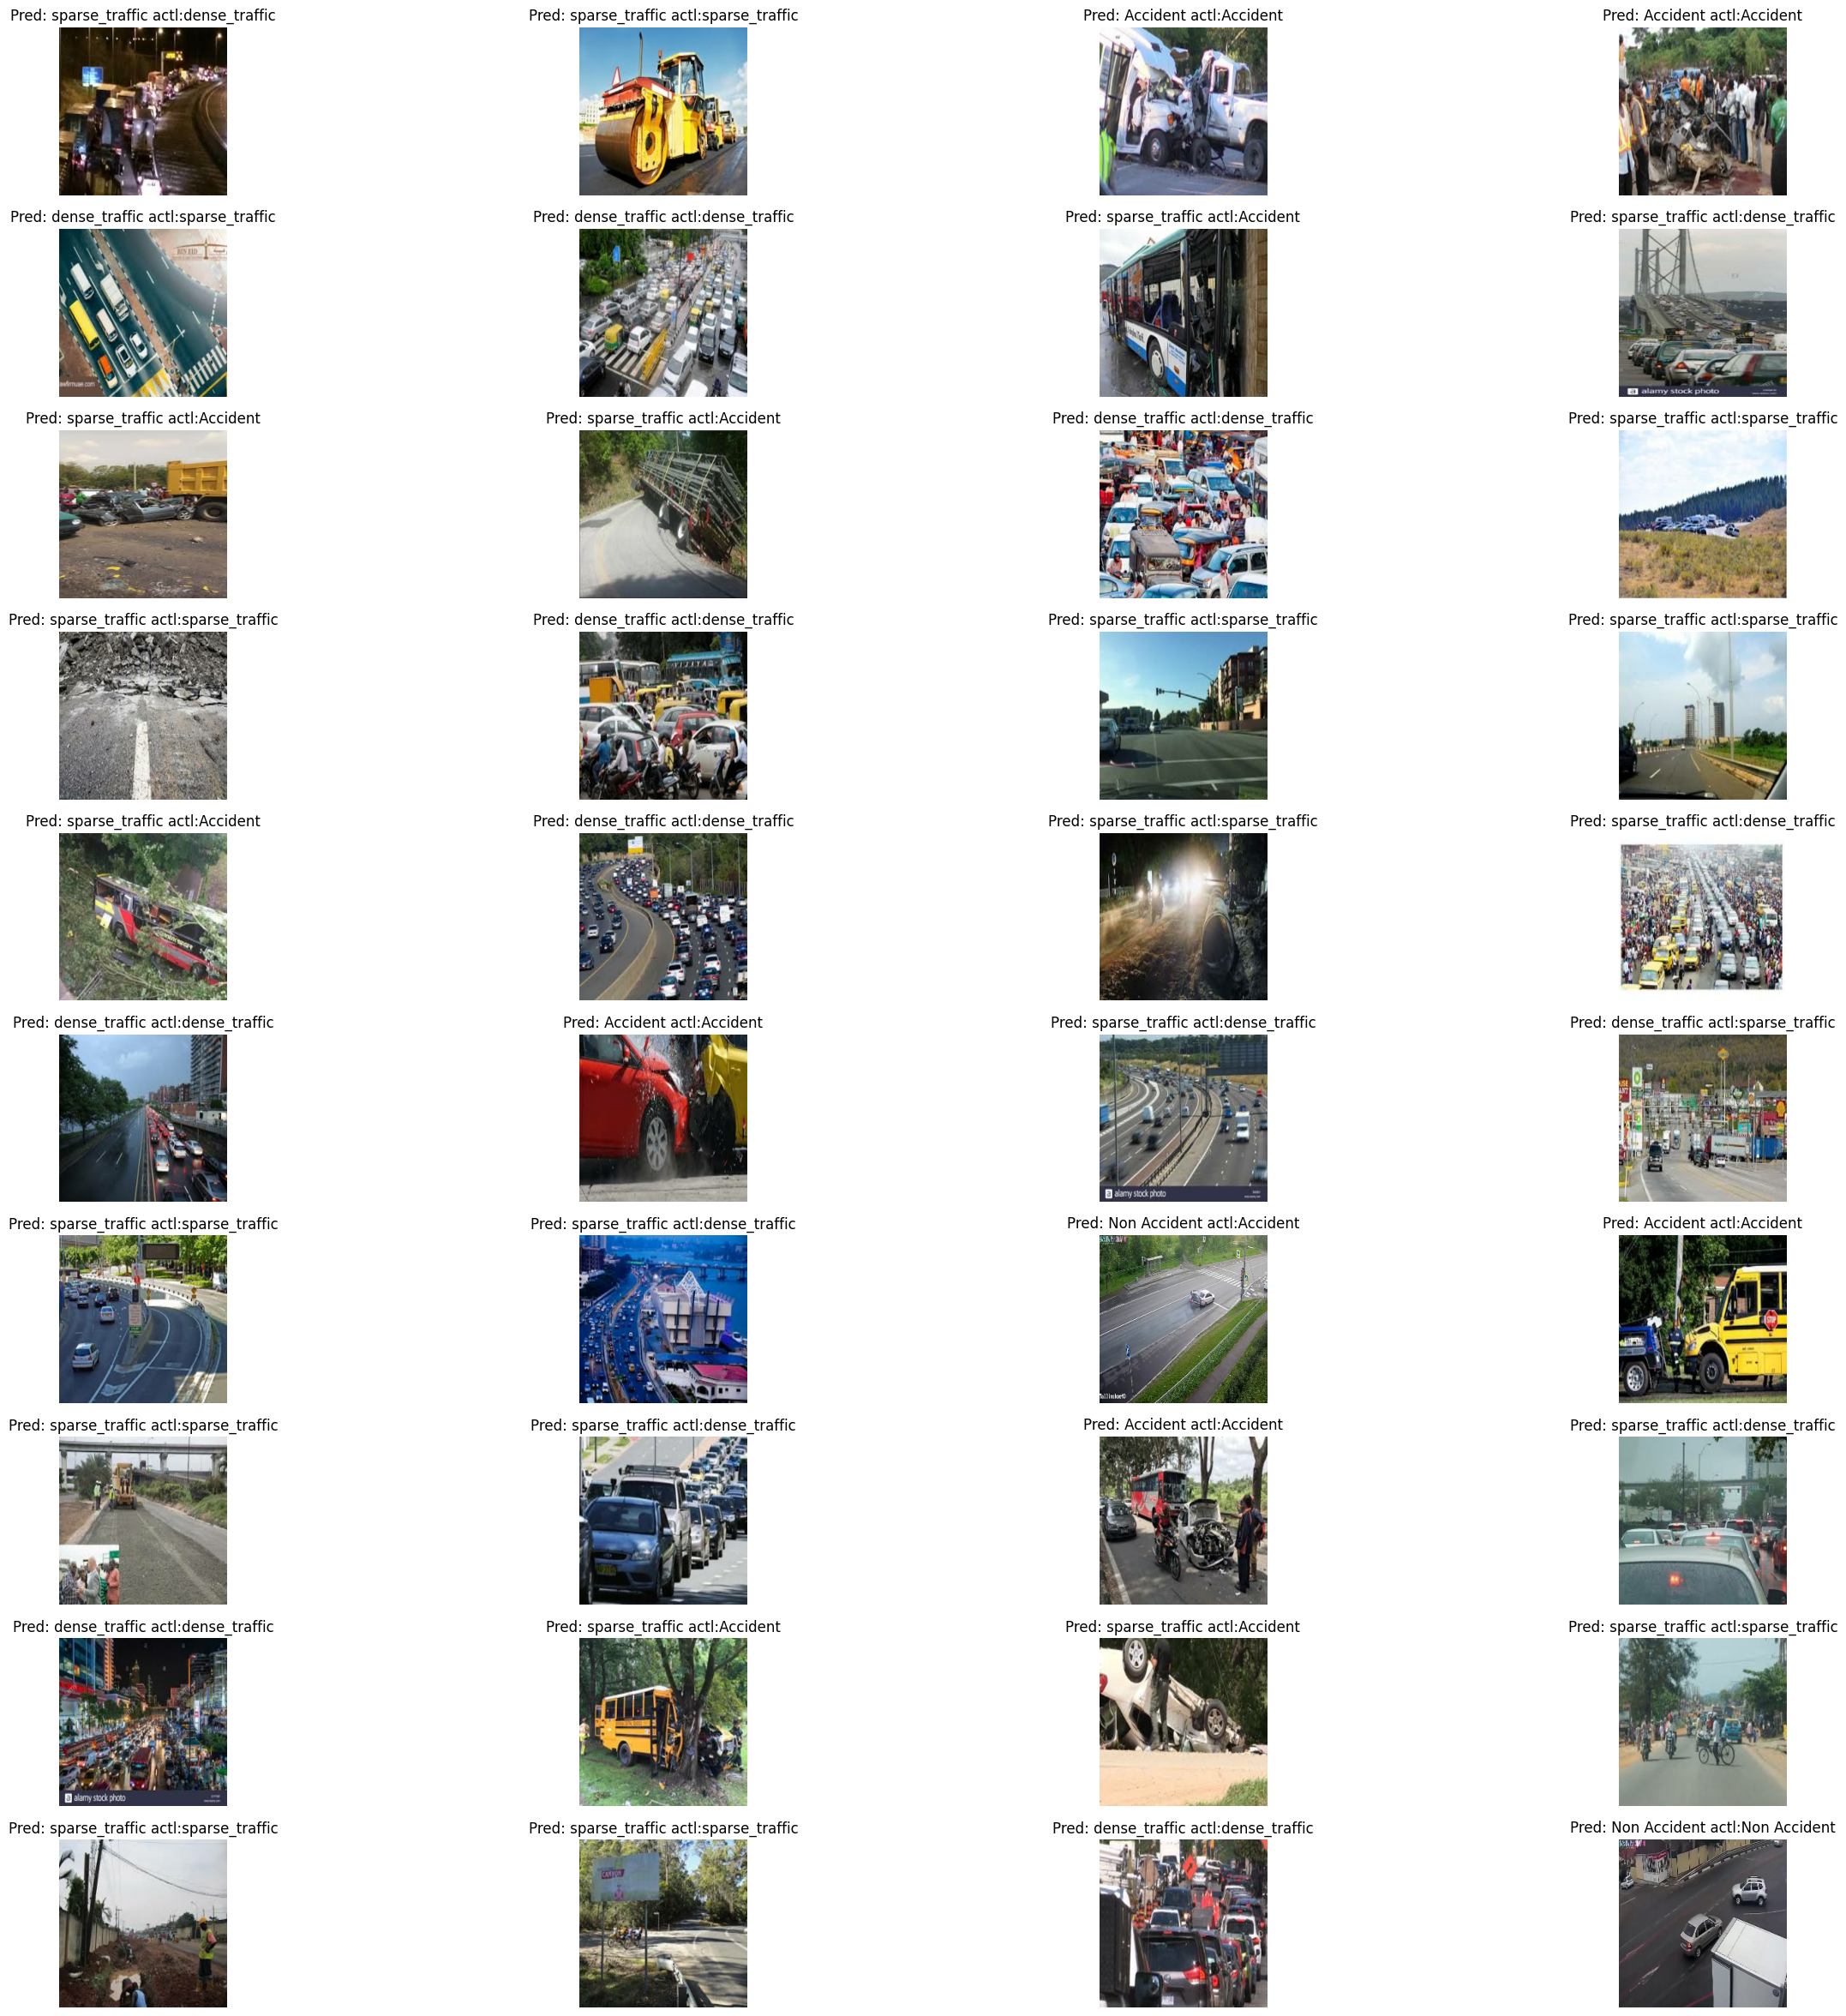

In [25]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [20]:
import pickle
pickle.dump(MyCnn, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://4eb41aef-0208-49cf-baf0-b472c03fdc6e/assets


INFO:tensorflow:Assets written to: ram://4eb41aef-0208-49cf-baf0-b472c03fdc6e/assets


In [24]:

# Open the pickle file
with open('model.pkl', 'rb') as f:
  # Load the data from the file
  data = pickle.load(f)


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://defdf405-b3e3-40c3-af83-83466294c718/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.